In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import cleaned dataset
df = pd.read_csv("HR_dataset_cleaned.csv")
df

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,...,3,3,1,17,3,3,5,2,0,3
1466,1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,...,3,1,1,9,5,3,7,7,1,7
1467,1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,...,4,2,1,6,0,3,6,2,0,3
1468,1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,...,3,4,0,17,3,2,9,6,0,8


In [4]:
#dop unnamed index column
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


# Multiple Regression Model: Predicting Percent Salary Hike

In [5]:
#list of columns to be used for salary data df
columns = ['TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
        'YearsWithCurrManager','PerformanceRating','PercentSalaryHike']

In [6]:
#filter df for selected salary columns
salaryData = df[columns]
salaryData

,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,PercentSalaryHike
0,8,6,4,0,5,3,0.11
1,10,10,7,1,7,4,0.23
2,7,0,0,0,0,3,0.15
3,8,8,7,3,0,3,0.11
4,6,2,2,2,2,3,0.12
...,...,...,...,...,...,...,...
1465,17,5,2,0,3,3,0.17
1466,9,7,7,1,7,3,0.15
1467,6,6,2,0,3,4,0.20
1468,17,9,6,0,8,3,0.14


In [7]:
#run full model
y = salaryData['PercentSalaryHike']
X = salaryData.drop('PercentSalaryHike', axis=1)
X = sm.add_constant(X) #adds a column of 1's 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:      PercentSalaryHike   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     365.9
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          6.22e-287
Time:                        13:58:34   Log-Likelihood:                 3450.7
No. Observations:                1470   AIC:                            -6887.
Df Residuals:                    1463   BIC:                            -6850.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Since the p value of YearsWithCurrManager > 0.05,  we remove it from the model.

In [8]:
#run model after dropping YearsWithCurrManager
y = salaryData['PercentSalaryHike']
X = salaryData.drop(['PercentSalaryHike','YearsWithCurrManager'], axis=1)
X = sm.add_constant(X) #adds a column of 1's 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:      PercentSalaryHike   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     439.4
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          2.82e-288
Time:                        13:58:34   Log-Likelihood:                 3450.7
No. Observations:                1470   AIC:                            -6889.
Df Residuals:                    1464   BIC:                            -6858.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Since the p value of TotalWorkingYears > 0.05 , we remove it from the model.

In [9]:
#run full model after removing TotalWorkingYears
y = salaryData['PercentSalaryHike']
X = salaryData.drop(['PercentSalaryHike','YearsWithCurrManager','TotalWorkingYears'], axis=1)
X = sm.add_constant(X) #adds a column of 1's 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:      PercentSalaryHike   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     549.7
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.14e-289
Time:                        13:58:34   Log-Likelihood:                 3450.7
No. Observations:                1470   AIC:                            -6891.
Df Residuals:                    1465   BIC:                            -6865.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Since the p value of YearsInCurrentRole > 0.05, we drop it.

In [10]:
#run full model after removing YearsInCurrentRole
y = salaryData['PercentSalaryHike']
X = salaryData.drop(['PercentSalaryHike','YearsWithCurrManager','TotalWorkingYears','YearsInCurrentRole'], axis=1)
X = sm.add_constant(X) #adds a column of 1's 

model = sm.OLS(y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:      PercentSalaryHike   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     733.3
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          3.95e-291
Time:                        13:58:34   Log-Likelihood:                 3450.7
No. Observations:                1470   AIC:                            -6893.
Df Residuals:                    1466   BIC:                            -6872.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Since the p value of YearsSinceLastPromotion > 0.05 , we remove it from the model.

In [11]:
#run full model after removing YearsSinceLastPromotion
y = salaryData['PercentSalaryHike']
X = salaryData.drop(['PercentSalaryHike','YearsWithCurrManager','TotalWorkingYears','YearsInCurrentRole','YearsSinceLastPromotion'], axis=1)
X = sm.add_constant(X) #adds a column of 1's 

model = sm.OLS(y, X)
results = model.fit() 
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:      PercentSalaryHike   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1100.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.63e-292
Time:                        13:58:34   Log-Likelihood:                 3450.3
No. Observations:                1470   AIC:                            -6895.
Df Residuals:                    1467   BIC:                            -6879.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0938      0.00

### Model Interpretation: The current model has decent fit being able to explain 60% of the variance. The remaining variables that have statistical significance are Years at Company (a low negative coeffecient) and PerformanceRating (a low positive coeefectient). These two variables can be used to help predict an employee's salary increase.
### Using sklearn package to model data to compare to our previous model using OLS 

In [12]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(df[['YearsAtCompany']])
train_y = np.asanyarray(df[['PercentSalaryHike']])

regr.fit(train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_) 
print(regr.coef_[0][0])    

Coefficients:  [[-0.00021501]]
Intercept:  [0.15360206]
-0.00021500895787378697


### Coefficient for both models match. Proceed to plot the fit line over the data. 

Text(0, 0.5, 'PercentSalaryHike')

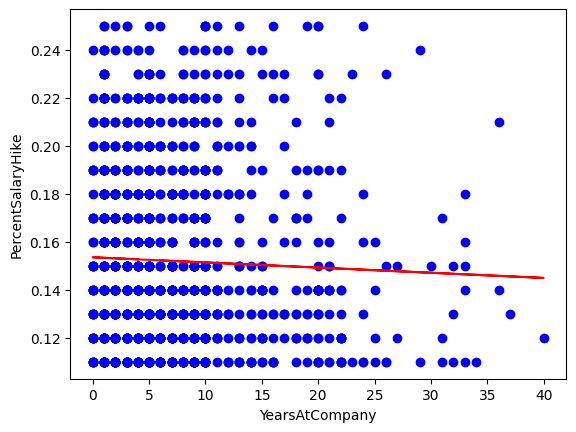

In [13]:
plt.scatter(df.YearsAtCompany, df.PercentSalaryHike,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') 
plt.xlabel("YearsAtCompany") 
plt.ylabel("PercentSalaryHike") 

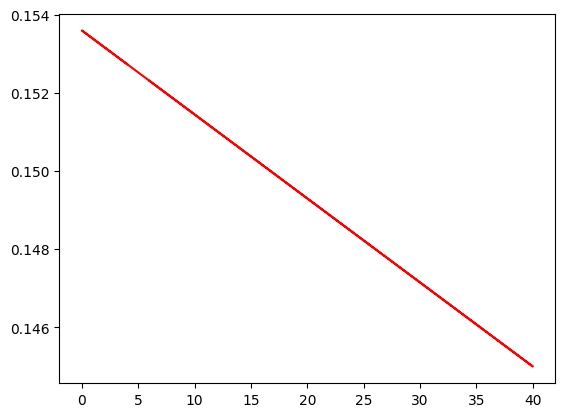

In [14]:
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') 

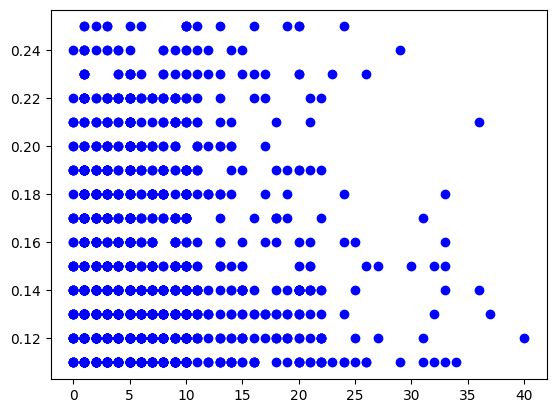

In [15]:
plt.scatter(df.YearsAtCompany, df.PercentSalaryHike,  color='blue')


In [16]:
# Classification 

# Classification Model: Predicting Attrition

In [17]:
# Label encoding below

In [18]:
#converting gender to 1's and 0's 

df['Gender_code'] = df['Gender'].map({'Male': 1, 'Female': 0}) 

#converting EducationField to 1 to 6


df['EducationField'] = df['EducationField'].map({
  'Life Sciences': 1,
    'Human Resources': 2,
    'Medical': 3,
    'Marketing': 4,
    'Technical Degree': 5,
    'Other': 6}) 


#converting OverTime to 1's and 0's 

df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0}) 


#converting OverTime to 1's and 0's 

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})        


In [19]:
classification_columns = ['Gender_code','Age','PerformanceRating','EducationField','MonthlyIncome','OverTime','Attrition']

In [20]:
classification_data = df[classification_columns]
classification_data

,Gender_code,Age,PerformanceRating,EducationField,MonthlyIncome,OverTime,Attrition
0,0,41,3,1,5993,1,1
1,1,49,4,1,5130,0,0
2,1,37,3,6,2090,1,1
3,0,33,3,1,2909,1,0
4,1,27,3,3,3468,0,0
...,...,...,...,...,...,...,...
1465,1,36,3,3,2571,0,0
1466,1,39,3,3,9991,0,0
1467,1,27,4,1,6142,1,0
1468,1,49,3,3,5390,0,0


### Using RandomForestClassifier 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report 
 



X = classification_data.drop('Attrition', axis=1)  
y = classification_data['Attrition']  




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


model = RandomForestClassifier(n_estimators=100) 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))      


Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       255
           1       0.38      0.21      0.27        39

    accuracy                           0.85       294
   macro avg       0.63      0.58      0.59       294
weighted avg       0.82      0.85      0.83       294



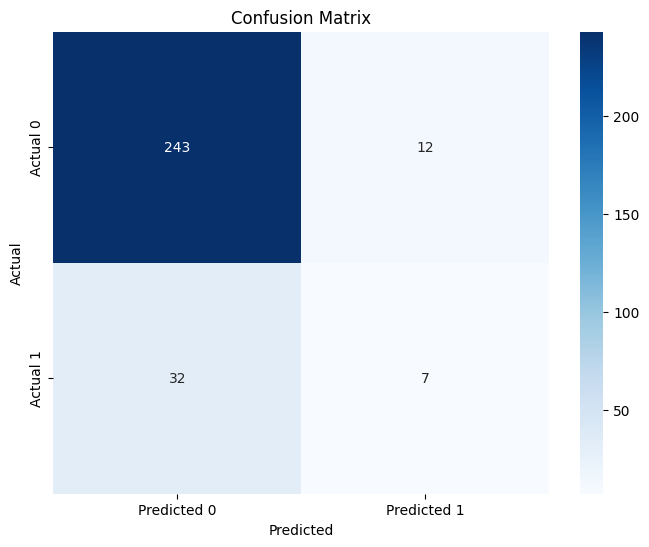

In [22]:
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

model = RandomForestClassifier(n_estimators=100) 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Model Interpretation: The model accurately predicted 85% of the outcomes based on a test set of 20% of the original dataset while running 100 predictions. ***add information about precision and recall*** 